$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
\newcommand{\E}[2][]{\mathbb{E}_{#1}\left[#2\right]}
\newcommand{\given}[]{~\middle\vert~}
$$

# CS236781: Deep Learning
# Tutorial 2: Supervised Learning

## Introduction

In this tutorial, we will cover:

* Basics of supervised learning
* Binary logistic regression from scratch using numpy
* Multiclass logistic regression from scratch with PyTorch and autograd

In [1]:
# Setup
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.size'] = 20

## Theory Reminders

### The supervised learning framework

We have a labeled dataset of $N$ labelled samples: $\mathcal{S} = \{ (\vec{x}^i,y^i) \}_{i=1}^N$, where
- $\vec{x}^i = \left(x^i_1, \dots, x^i_D\right) \in \mathcal{X}$  is a **sample** or **feature vector**.
- $y^i \in \mathcal{Y}$ is the **label**.
- For classification with $C$ classes, $\mathcal{Y} = \{0,\dots,C-1\}$, so each $y^i$ is a **class label**.
- Usually we assume each labeled sample $(\vec{x}^i,y^i)\sim\mathcal{D}$,
  i.e. each labeled sample is drawn from a joint distribution $\mathcal{D}$ over $\mathcal{X}\times\mathcal{Y}$.

Our **model** is a parametrized set of functions $\mathcal{H}\subseteq \mathcal{Y}^{\mathcal{X}}$.

For example, the following hypothesis class
$$
\mathcal{H} =
\left\{ h: \mathcal{X}\rightarrow\mathcal{Y}
~\vert~
h(\vec{x}) = \varphi(\vectr{w}\vec{x}+b); \vec{w}\in\set{R}^D,~b\in\set{R}\right\}
$$
where $\varphi(\cdot)$ is some nonlinear function, is known as the **perceptron** model.

<center><img src="imgs/perceptron.png" width=400 /></center>

A **pointwise loss function** is some $\ell:\mathcal{Y}\times\mathcal{Y}\to\mathcal{R}_{\geq 0}$, e.g.
- $\ell(y,\hat{y})=(y-\hat{y})^2$
- $\ell(y,\hat{y})= -y\log(\hat{y})-(1-y)\log(1-\hat{y})$

The task: Given the training set $\mathcal{S} = \{ (\vec{x}^i,y^i) \}_{i=1}^N \sim \mathcal{D}$, find 
a predictor (hypothesis) $h: \mathcal{X}\to\mathcal{Y}$ which minimizes **population loss**:

$$
L_{\mathcal{D}}(h) = \E[(\vec{x},y)\sim\mathcal{D}]{\ell(y, h(\vec{x})}.
$$

This is also known as the out-of-sample loss.

Can we solve this problem?

Joint-distribution $\mathcal{D}$ is unknown!

Instead, we define an **empirical loss** $L_{\mathcal{S}}(h)$ as the measure of how well a function $h\in\mathcal{H}$ fits the data $\mathcal{S}$, for example
$$
L_{\mathcal{S}}(h) = \frac{1}{N} \sum_{i=1}^{N} \ell(h(\vec{x}^i), y^i) + R(h)
$$
where

- $\ell(y,\hat{y})$ is some pointwise loss (depends on on the data).
- $R(h)$ is a regularization term (depends only on the model).

### Optimization

The model is **trained** by updating it's parameters to improve its performance on some data.

We wish to find a parametrization $\vec{w}^\ast$ of our model $h^{\ast}_{\mathcal{S}}(\vec{x};\vec{w}^\ast)\in\mathcal{H}$ such that
$$
h^{\ast}_{\mathcal{S}} = \arg\min_{h\in\mathcal{H}} L_{\mathcal{S}}(h)
$$

Usual approach: **Stochastic gradient descent** (will be covered in next lecture)
$$
\vec{w} \leftarrow \vec{w} - \eta \nabla_{\vec{w}} L(\vec{w})
$$

<center><img src="imgs/sgd2d_2.png" width=1000 /></center>

Why is it stochastic?

<center><img src="imgs/sgd1d.png" width=1000 /></center>

Generally the loss is non-convex and we have no guarantee of converging to the global optimum!
$\Rightarrow$ **Optimization Error**

### Generalization and Expressiveness

What are **other** sources of errors in our approach (besides optimization)?

We train to minimize our empirical loss $L_\mathcal{S}$ instead of the population loss $L_\mathcal{D}$ $\Rightarrow$ **Generalization Error**

We only consider a limited set of possible functions, $\mathcal{H}$ $\Rightarrow$ **Approximation Error**

<center><img src="imgs/error_types.png" width=1200 /></center>

### Binary Logistic Regression

Actually a **classification** model. We're trying to classify data into 2 classes.

- Domain: $\vec{x}^i \in \set{R}^D$
- Target: $y^i \in \{0,1\}$
- Model: $\hat{y} = h(\vec{x}) = \sigma(\vectr{w}\vec{x}+b)$, where $\sigma(\vec{z})$ is the **logistic function**:
    $$\sigma(\vec{z}) = \frac{1}{1+e^{-\vec{z}}}.$$
- Probabilistic interpretation: $\hat{y}=P(\rvar{Y}=1|\rvec{X}=\vec{x})$.

In [3]:
def logistic(z):
    return 1 / (1 + np.exp(-z))

x = np.arange(-5, 5, .01)
y_hat = logistic(x)

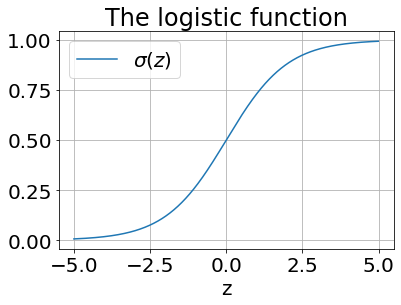

In [4]:
plt.plot(x, y_hat, label='$\sigma(z)$')
plt.grid(True); plt.xlabel('z'); plt.legend(); plt.title('The logistic function');

loss_y0 = -np.log(1-y_hat)
loss_y1 = -np.log(y_hat)

To optimize, we minimize the **negative log-likelihood** (equivalent to maximizing likelihood):

$$
\bb{w}^\ast = \mathrm{arg}\max_{ \bb{w}} \prod_{i=1}^n P(y_i | \bb{x}_i;\vec{w}) = \mathrm{arg}\min_{ \bb{w}} \sum_{i=1}^n -\log P(y_i | \bb{x}_i; \vec{w})
$$

$$
\begin{align}
L(\bb{w}) &= \sum_{i=1}^n -\log P(y_i | \bb{x}_i)\\
&= \sum_{i=1}^n -y_i \log P(y_i=1 | \bb{x}_i) - (1-y_i) \log P(y_i=0 | \bb{x}_i) \\
&= \sum_{i=1}^n -y_i \log \hat{y}_i - (1-y_i) \log(1-\hat{y}_i)
\end{align}
$$

The resulting pointwise loss is also known as **cross-entropy**:
$$
\begin{align}
\ell(y, \hat{y}) &=  - y \log(\hat{y}) - (1-y) \log(1-\hat{y}) \\
\end{align}
$$

Optimization scheme: No closed form solution, but loss is **convex** so gradient-based approach leads to global optimum.

$$
\begin{align}
\ell(y, \hat{y}) &=  - y \log(\hat{y}) - (1-y) \log(1-\hat{y}) \\
\end{align}
$$

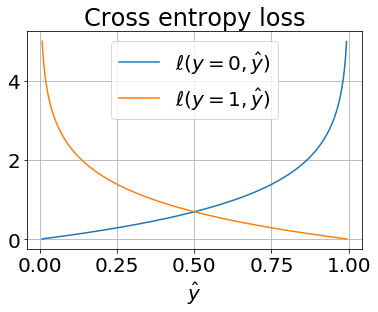

In [5]:
plt.plot(y_hat, loss_y0, label='$\ell(y=0,\hat{y})$')
plt.plot(y_hat, loss_y1, label='$\ell(y=1,\hat{y})$')
plt.grid(True); plt.xlabel('$\hat{y}$'); plt.legend(); plt.title('Cross entropy loss');

To apply gradient descent, we need to know the gradient of the loss w.r.t. the parameters $\vec{w}$.

Exercise: Prove that for the binary cross entropy loss, we have
$$
\pderiv{\ell(y,\hat{y})}{\vec{w}}= (\hat{y}-y)\vec{x}.
$$

Proof:

First, we apply the chain-rule
$$
\pderiv{\ell(y,\hat{y})}{\vec{w}}=\pderiv{\ell}{\hat{y}}\cdot\pderiv{\hat{y}}{z}\cdot\pderiv{z}{\vec{w}},
$$
where $z=\vectr{w}\vec{x}$.

Now,
$$
\begin{align}
\pderiv{\ell}{\hat{y}}&=-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}}=\frac{\hat{y}-y}{\hat{y}(1-\hat{y})}\\
\pderiv{\hat{y}}{z}&=\frac{e^{-z}}{(1+e^{-z})^2}=
\frac{e^{-z}}{1+e^{-z}}\cdot\frac{1}{1+e^{-z}}=(1-\sigma(z))\sigma(z)=(1-\hat{y})\hat{y}\\
\pderiv{z}{\vec{w}}&=\vec{x}
\end{align}
$$

## Part 1: Binary Logistic Regression

Let's see a quick example of implementing this algorithm and training it from scratch using just `numpy` (and a toy dataset from `sklearn`).

## Dataset

The `scikit-learn` library comes with a few [toy datasets](http://scikit-learn.org/stable/datasets/index.html#toy-datasets) that are fun to quickly train small models on.

As an example we'll load the Wisconsin-breast cancer database:
- 569 samples of cancer patients
- 30 features: various properties of tumor cells extracted from images
- 2 classes: Tumor is either Benign or Malignant

In [6]:
import sklearn.datasets

ds_cancer = sklearn.datasets.load_breast_cancer()
feature_names = ds_cancer.feature_names
target_names = ds_cancer.target_names
n_features = len(feature_names)

X, y = ds_cancer.data, ds_cancer.target
y_names = np.full_like(y, target_names[0].upper(), dtype=target_names.dtype)
y_names[y==1] = target_names[1].upper()
n_samples = len(y)

print(f'X: {X.shape}')
print(f'y: {y.shape}')
print(f'feature names: {feature_names}')
print(f'target  names: {target_names}')

X: (569, 30)
y: (569,)
feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target  names: ['malignant' 'benign']


In [7]:
# Load into a pandas dataframe and show some samples
df_cancer = pd.DataFrame(data=X, columns=ds_cancer.feature_names)
df_cancer = df_cancer.assign(CLASS=y_names)
df_cancer.iloc[100:110, 0::3]

,mean radius,mean area,mean concavity,mean fractal dimension,perimeter error,compactness error,symmetry error,worst texture,worst smoothness,worst concave points,CLASS
100,13.610,582.7,0.08625,0.05871,2.8610,0.014880,0.01465,35.27,0.1265,0.11840,MALIGNANT
101,6.981,143.5,0.00000,0.07818,1.5530,0.010840,0.02659,19.54,0.1584,0.00000,BENIGN
102,12.180,458.7,0.02383,0.05677,1.1830,0.006098,0.01447,32.84,0.1123,0.07431,BENIGN
103,9.876,298.3,0.06154,0.06322,1.5280,0.021960,0.01609,26.83,0.1559,0.09749,BENIGN
104,10.490,336.1,0.02995,0.06481,2.3020,0.022190,0.02710,23.31,0.1219,0.03203,BENIGN
105,13.110,530.2,0.20710,0.07692,2.4100,0.029120,0.01547,22.40,0.1862,0.19860,MALIGNANT
106,11.640,412.5,0.07070,0.06520,2.1550,0.023100,0.01565,29.26,0.1688,0.12180,BENIGN
107,12.360,466.7,0.02643,0.06066,0.8484,0.010470,0.01251,27.49,0.1184,0.08442,BENIGN
108,22.270,1509.0,0.42640,0.07039,10.0500,0.086680,0.03112,28.01,0.1701,0.29100,MALIGNANT
109,11.340,396.5,0.05133,0.06529,1.5970,0.015570,0.01568,29.15,0.1699,0.08278,BENIGN


In [8]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f'train: X={X_train.shape} y={y_train.shape}')
print(f'test : X={X_test.shape} y={y_test.shape}')

train: X=(398, 30) y=(398,)
test : X=(171, 30) y=(171,)


In [9]:
# Standardize the features
mu_X = np.mean(X_train, axis=0)
sigma_X = np.std(X_train, axis=0)

# Note1: each feature is standardized individually:
print(f'mu_X: {mu_X}')
print(f'sigma_X: {mu_X}')

# Note2: Test set must be transformed identically to training set
X_train_sc = (X_train - mu_X) / sigma_X
X_test_sc = (X_test - mu_X) / sigma_X

mu_X: [1.40938467e+01 1.93415327e+01 9.16989447e+01 6.50784171e+02
 9.57892714e-02 1.03143442e-01 8.84457681e-02 4.80487286e-02
 1.80492965e-01 6.27095729e-02 3.91917085e-01 1.19798166e+00
 2.77358819e+00 3.82153342e+01 6.98150251e-03 2.53617487e-02
 3.21848910e-02 1.15316784e-02 2.06816231e-02 3.80615352e-03
 1.62665603e+01 2.58163065e+01 1.07220678e+02 8.79696734e+02
 1.32259095e-01 2.57169975e-01 2.78709540e-01 1.14484601e-01
 2.92937688e-01 8.42292211e-02]
sigma_X: [1.40938467e+01 1.93415327e+01 9.16989447e+01 6.50784171e+02
 9.57892714e-02 1.03143442e-01 8.84457681e-02 4.80487286e-02
 1.80492965e-01 6.27095729e-02 3.91917085e-01 1.19798166e+00
 2.77358819e+00 3.82153342e+01 6.98150251e-03 2.53617487e-02
 3.21848910e-02 1.15316784e-02 2.06816231e-02 3.80615352e-03
 1.62665603e+01 2.58163065e+01 1.07220678e+02 8.79696734e+02
 1.32259095e-01 2.57169975e-01 2.78709540e-01 1.14484601e-01
 2.92937688e-01 8.42292211e-02]


## Model Implementation

We'll implement based on the above definitions.

The model will be implemented as a class with an API that conforms to the `sklearn` models, specifically see
`sklearn`'s [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) class.


In [10]:
class BinaryLogisticRegression(object):
    def __init__(self, n_iter=100, learn_rate=0.1):
        self.n_iter = n_iter
        self.learn_rate = learn_rate
    
    def fit(self, X, y):
        n, d = X.shape
        self.losses_ = []
        self.w_ = np.random.randn(d+1) * 0.1
        
        for i in range(self.n_iter):
            Xb = np.hstack((np.ones((X.shape[0],1)), X)) # Add bias column
            y_hat = self.predict_proba(Xb, add_bias=False)
            
            loss = -y.dot(np.log(y_hat)) - ((1 - y).dot(np.log(1 - y_hat)))
            self.losses_.append(loss)
            loss_grad = 1/n * Xb.T.dot(y_hat - y)  # (d,n) * (n,)
            
            self.w_ += -self.learn_rate * loss_grad
        return self
    
    def predict_proba(self, X, add_bias=True):
        Xb = np.hstack((np.ones((X.shape[0],1)), X)) if add_bias else X
        z = np.dot(Xb, self.w_) # (n,d) * (d,)
        return logistic(z) # shape (n,)
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return np.array(proba > .5, dtype=np.int)

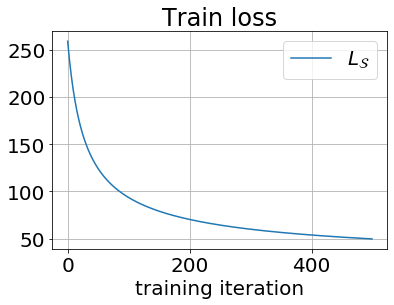

In [11]:
# Fit the model to the training data
lr_model = BinaryLogisticRegression(n_iter=500, learn_rate=0.01)
lr_model.fit(X_train_sc, y_train)

plt.plot(lr_model.losses_, label='$L_{\mathcal{S}}$');
plt.xlabel('training iteration'); plt.legend(); plt.grid(True); plt.title('Train loss');

In [12]:
y_train_pred = lr_model.predict(X_train_sc)
train_acc = np.sum(y_train_pred == y_train)/len(y_train)
print(f'train set accuracy: {train_acc*100:.2f}%')

y_test_pred = lr_model.predict(X_test_sc)
test_acc = np.sum(y_test_pred == y_test)/len(y_test)
print(f'test set accuracy: {test_acc*100:.2f}%')

train set accuracy: 97.49%
test set accuracy: 95.32%


## Part 2: Multiclass Logistic Regression

What if we have $C$ classes? Can we still use logistic regression?

A naïve approach is to train $C$ binary logistic regression classifiers, for example in a One vs. Rest scheme,
and then predict based on the classifier returning the greatest probability.

One major drawback of this approach is that it doesn't really create a probility distribution over the classes. 

For example, a sample might be classified as class A with probability $0.8$ and class $B$ with $0.7$ since nothing constrains the different classifiers.

### The softmax function

Let's create a way to generate a probability distribution for our $C$ classes given their scores.
We'll define a function called **softmax** as follows:

$$
\mathrm{softmax}(\vec{z}) = \frac{e^{\vec{z}}}{\sum_{j=1}^{C} e^{z_j}}
$$

note that this is a vector valued, multivariate function. The exponent in the enumerator operates elementwise.

The result of softmax is a vector with elements in $[0,1]$ that all sum to $1$.

### The multiclass model

Our model can now be defined as

$$\hat{\vec{y}} = h(\vec{x}) = \mathrm{softmax}(\mattr{W}\vec{x}+\vec{b})$$

where,
- $\hat{\vec{y}}$ is a $C\times 1$ vector of class probabilities.
- ${\vec{x}}$ is a $D\times 1$ sample.
- $\mat{W}$ is a $D\times C$ matrix representing the per-class weights.
- $\vec{b}$ is a per-class bias vector of length $C$.

Probabilistic interpretation: $\hat{y}_j = P(\rvar{Y}=j|\rvec{X}=\vec{x})$.

To train such a model we need our labels to also be **probability distributions** instead of simply the number of the correct class.

We'll transform our labels to a 1-hot encoded vector corresponding to a **delta distribution**.
For example, if $y^i=j$ then we'll create
$$
\vec{y}^i = [0,\dots,0,\underbrace{1}_{j\mathrm{th\ component}},0,\dots,0]^\top
$$

### Cross-Entropy loss

After defing the 1-hot label vectors, the multiclass extension of the binary cross-entropy is straightforward:

$$
\ell(\vec{y}, \hat{\vec{y}}) = - \vectr{y} \log(\hat{\vec{y}})
$$

Note that only the probability assigned to the correct class affects the loss.

This can be interpreted as trying to move the probability distribution created by the model towards the delta distribution.

### Dataset

This time we'll tackle an image classification task, the MNIST database of handwritten digits.

Today this is also considered a toy dataset, even though it was used in the past to benchmark state of the art classification algorithms.

In [13]:
import os
import torch
import torch.utils.data
import torchvision
import torchvision.transforms
import plot_utils

In [14]:
# Define the transforms that should be applied to each image in the dataset before returning it
tf_ds = torchvision.transforms.ToTensor()

batch_size = 128
data_root = os.path.expanduser("~/.pytorch-datasets")

# Training and test datasets
ds_train = torchvision.datasets.MNIST(root=data_root, download=True, train=True, transform=tf_ds)
ds_test =  torchvision.datasets.MNIST(root=data_root, download=True, train=False, transform=tf_ds)

# Data loaders
dl_train = torch.utils.data.DataLoader(ds_train, batch_size, shuffle=True)
dl_test = torch.utils.data.DataLoader(ds_test, batch_size)

x0, y0 = ds_train[0]
n_features = torch.numel(x0)
n_classes = 10

x0: torch.Size([1, 28, 28]), y0: 5


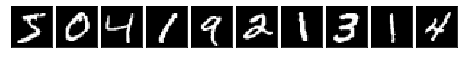

In [15]:
# Show first few samples
print(f'x0: {x0.shape}, y0: {y0}')
plot_utils.dataset_first_n(ds_train, 10, cmap='gray');

Note that when training with SGD, we're actually working with **minibatches** of 128 samples:

In [16]:
x0, y0 = next(iter(dl_train))
x0.shape

torch.Size([128, 1, 28, 28])

### Model Implementation

This time we'll use `pytorch` tensors and its [`autograd`](https://pytorch.org/docs/stable/autograd.html) functionality to implement our model.

This means we wont have to implement any gradient calculations!

In [17]:
def softmax(z):
    # z is a batch of class scores per sample (N,C)
    zmax, _ = torch.max(z, dim=1, keepdim=True)
    # normalization trick to prevent numerical instability: shift so that the highest number is 0
    z = z - zmax # note broadcasting: (N,C) - (N,1)
    e_to_z = torch.exp(z)
    return e_to_z / torch.sum(e_to_z, dim=1, keepdim=True) # probabilities, (N,C)

In [18]:
softmax(torch.tensor([[1, 2, 3.]]))

tensor([[0.0900, 0.2447, 0.6652]])

In [19]:
def cross_entropy_loss(y, y_hat):
    # y_hat is a batch of probabilities, y is onehot, both (N,C)
    return torch.sum( - y * torch.log(y_hat + 1e-6) )

In [20]:
def onehot(y, n_classes):
    y_onehot = torch.zeros(len(y), n_classes, dtype=torch.float32) # (N,C)
    y_onehot = y_onehot.scatter(1, y.reshape(-1,1), 1) # dim, idx, value
    return y_onehot

In [21]:
class MCLogisticRegression(object):
    def __init__(self, n_features, n_classes):
        # Define our parameter tensors
        # Specify we want to track their gradients with autograd
        self.W = torch.randn(n_features, n_classes, requires_grad=True)
        self.b = torch.randn(n_classes, requires_grad=True)
        self.params = [self.W, self.b]
    
    def __call__(self, *args):
        return self.forward(*args)

    def forward(self, X):
        z = torch.mm(X, self.W) + self.b
        y_hat = softmax(z)
        return y_hat

Let's try out the model and loss on the first batch:

In [22]:
model = MCLogisticRegression(n_features, n_classes)

# Flatten images and convert labels to onehot
x0_flat = x0.reshape(-1, n_features)
y0_onehot =  onehot(y0, n_classes)
print(f'x0_flat: {x0_flat.shape}')
print(f'y0_onehot: {y0_onehot.shape}\n')

# Forward pass and compute loss
y0_hat = model(x0_flat)
loss = cross_entropy_loss(y0_onehot, y0_hat)
print('loss = ', loss)

x0_flat: torch.Size([128, 784])
y0_onehot: torch.Size([128, 10])

loss =  tensor(1360.1753, grad_fn=<SumBackward0>)


What is this `grad_fn` business?

Since we said `require_grad=True`, every operation performed on these tensors is recorded, and a **computation graph** can be built:

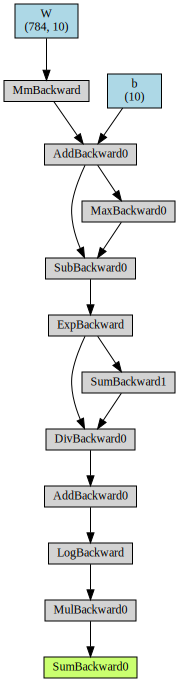

In [23]:
import torchviz
torchviz.make_dot(loss, params=dict(W=model.W, b=model.b))

This graph is what allows efficient implementation of the **back-propagation** algorithm which you'll learn about in the next lecture.

### Training

The SGD will be as before, but now we'll take the gradients from the `grad` property of our parameter tensors.

In [24]:
def sgd_optimizer(params, learn_rate):
    # params is a list of Tensors
    with torch.autograd.no_grad(): # ignore this for now, will be clear later on
        for param in params:
            param -= learn_rate * param.grad
            param.grad.zero_()

Inference and prediction accuracy:

In [25]:
def evaluate_accuracy(dataloader, model, max_batches=None):
    n_correct = 0.
    n_total = 0.
    for i, (X, y) in enumerate(dataloader):
        X = X.reshape((-1,n_features)) # flatten images into vectors
        
        with torch.autograd.no_grad():
            y_hat = model(X)
        
        predictions = torch.argmax(y_hat, dim=1)
        n_correct += torch.sum(predictions == y).type(torch.float32)
        n_total += X.shape[0]
        
        if max_batches and i+1 >= max_batches:
            break
        
    return (n_correct / n_total).item()

test_set_acc = evaluate_accuracy(dl_test, MCLogisticRegression(n_features, n_classes))
print(f'Test set accuracy pre-training: {test_set_acc*100:.2f}%')

Test set accuracy pre-training: 7.54%


**Training loop**
- Go over dataset in batches
- Forward pass: Compute predictions and build computation graph
- Calculate loss
- Set existing gradients to zero
- Backward pass: Use back-propagation algorithm to calculate the gradients
- Optimization step: Use the gradients to update the parameters

In [26]:
epochs = 10
max_batches = 20  # limit batches so training is fast (just as a demo)
learn_rate = .005
num_samples = len(ds_train)
model = MCLogisticRegression(n_features, n_classes)

In [27]:
# Epoch: traverse all samples
for e in range(epochs):
    cumulative_loss = 0

    # Update model per data batch with SGD
    for i, (X, y) in enumerate(dl_train):
        X = X.reshape((-1,n_features))
        y_onehot = onehot(y, n_classes)
        
        # Forward pass
        y_hat = model(X)
        loss = cross_entropy_loss(y_onehot, y_hat)
        
        # Backward pass & parameter update
        loss.backward() # Use backprop algorithm to calc gradients
        sgd_optimizer(model.params, learn_rate) # Use gradients for SGD
        
        cumulative_loss += loss.item()
        if i+1 > max_batches:
            break

    test_accuracy = evaluate_accuracy(dl_test, model, max_batches)
    train_accuracy = evaluate_accuracy(dl_train, model, max_batches)
    
    avg_loss = cumulative_loss/num_samples
    print(f"Epoch {e}. Loss: {avg_loss:.3f}, Train Acc {train_accuracy*100:.2f}, Test Acc {test_accuracy*100:.2f}")   

Epoch 0. Loss: 0.301, Train Acc 41.72, Test Acc 40.00
Epoch 1. Loss: 0.174, Train Acc 55.82, Test Acc 54.41
Epoch 2. Loss: 0.119, Train Acc 63.36, Test Acc 61.17
Epoch 3. Loss: 0.070, Train Acc 72.19, Test Acc 67.66
Epoch 4. Loss: 0.063, Train Acc 74.96, Test Acc 71.76
Epoch 5. Loss: 0.054, Train Acc 76.84, Test Acc 73.36
Epoch 6. Loss: 0.049, Train Acc 78.36, Test Acc 75.31
Epoch 7. Loss: 0.046, Train Acc 80.27, Test Acc 76.91
Epoch 8. Loss: 0.045, Train Acc 80.12, Test Acc 77.77
Epoch 9. Loss: 0.042, Train Acc 80.39, Test Acc 78.36


**Notes:**
- This is a very basic implementation. We didn't even include any regularization term which would be a problem if this weren't a toy dataset.
- PyTorch provides many functions and classes that we could have used, for example:
  - Perceptron fully connected layer with model parameters
  - Softmax
  - SGD and many other optimizers
  - Cross entropy loss
  
  however the purpose here was to show an (almost) from-scratch implementation using only tensors,
  in order to see whats "under the hood" (more or less) of the PyTorch functions.

## Image credits
- MartinThoma [CC0], via Wikimedia Commons https://commons.wikimedia.org/wiki/File:Perceptron-unit.svg
- Dr. Nadav Cohen, http://www.cohennadav.com/files/icermw19_slides.pdf
- Fundamentals of Deep Learning, Nikhil Buduma, Oreilly 2017